In [9]:
import json
import networkx as nx
import matplotlib.pyplot as plt

In [14]:

# Load the JSON file that contains the adjacency list
def load_graph(json_file):
    with open(json_file, 'r') as f:
        return json.load(f)

# Function to create and visualize the graph
def visualize_graph(json_file):
    # Load the graph from the JSON file
    graph_data = load_graph(json_file)
    
    # Create a graph object
    G = nx.Graph()

    # Add nodes and edges from the JSON data
    for station in graph_data:
        station_code = station['CODE_UIC']
        G.add_node(station_code)  # Add the station as a node
        
        # Add edges to all connected stations
        for connection in station['connected_to']:
            connected_station_code = connection['station']
            distance = connection['distance']
            G.add_edge(station_code, connected_station_code, weight=distance)

    # Visualize the graph using matplotlib and networkx
    pos = nx.spring_layout(G, seed=42)  # Layout for positioning the nodes

    # Draw the graph
    plt.figure(figsize=(10, 10))
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=20, node_color="lightblue", alpha=0.8)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    
    # Draw labels for nodes
    # nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
    
    # Draw edge labels (distances)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title("Graph of Train Stations and Their Connections")
    plt.show()


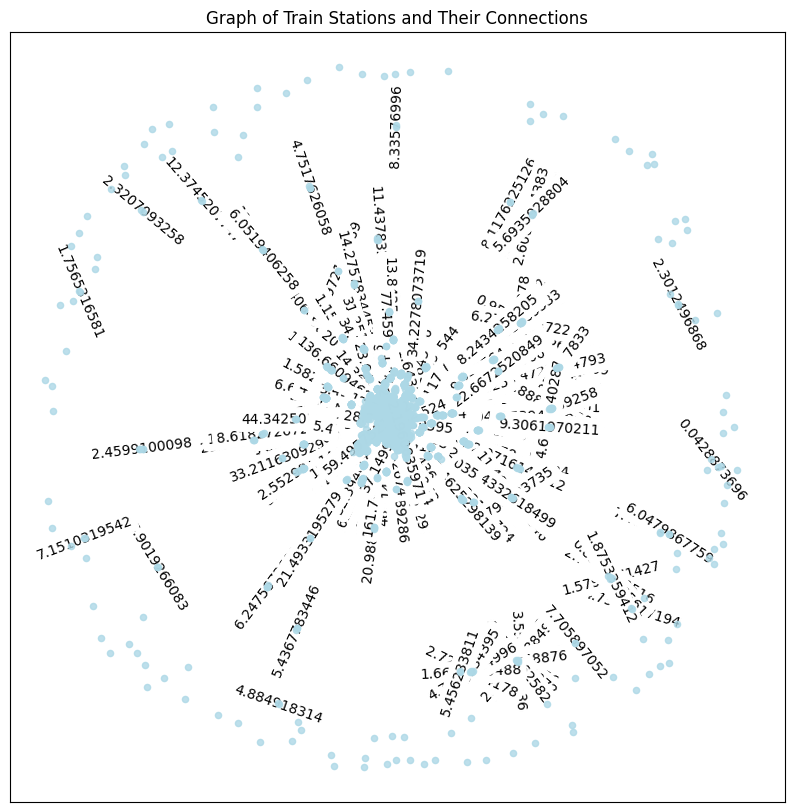

In [15]:
# Example usage:
json_file = './output/adjacency_list_stations_uic_dict.json'

# Visualize the graph
visualize_graph(json_file)